In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyse Exploratoire des Données (EDA)

In [681]:
# Chargement des données
df = pd.read_csv('german_credit_data2.csv')

# Aperçu des données
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Dictionnaire Data
<b>1. Age</b> (numeric)<br>
<b>2. Sex</b> (text: male, female)<br>
<b>3. Job</b> (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>4. Housing</b> (text: own, rent, or free)<br>
<b>5. Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>6. Checking account</b> (numeric, in DM - Deutsch Mark)<br>
<b>7. Credit amount</b> (numeric, in DM)<br>
<b>8. Duration</b> (numeric, in month)<br>
<b>9. Purpose</b> (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)<br>
<b>10. Risk</b> (text: target, good risk and bad risk)<br>

In [684]:
df = df.drop(columns=['Unnamed: 0'])

In [686]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [688]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


In [690]:
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


In [692]:
# Analyse des valeurs manquantes
print(df.isnull().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [694]:
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")
df["Checking account"] = df["Checking account"].fillna("unknown")

In [696]:
df.duplicated().sum()

0

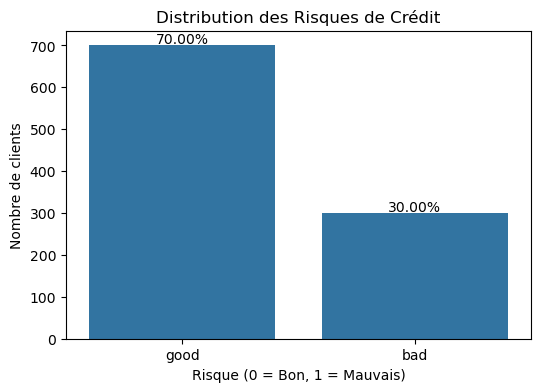

In [698]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comptage des valeurs
risk_counts = df['Risk'].value_counts(normalize=True) * 100  # pourcentages

# Affichage du graphique
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Risk', data=df)

# Ajout des pourcentages au-dessus des barres
for p in ax.patches:
    height = p.get_height()
    percentage = height / len(df) * 100
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{percentage:.2f}%', ha='center')

plt.title('Distribution des Risques de Crédit')
plt.ylabel('Nombre de clients')
plt.xlabel('Risque (0 = Bon, 1 = Mauvais)')
plt.show()


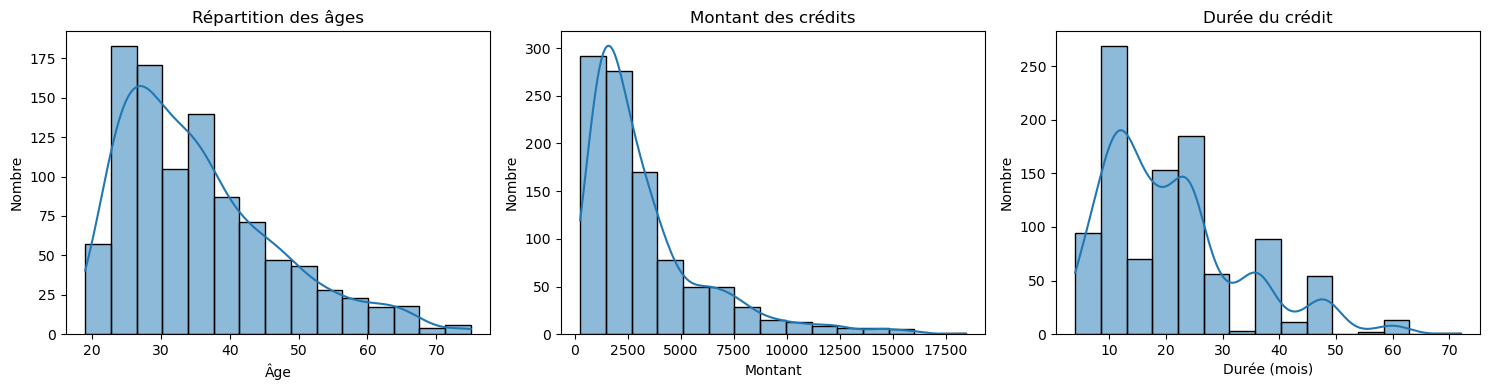

In [700]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure globale
plt.figure(figsize=(15, 4))

# Countplot pour l'âge (regroupé par intervalles)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=15,kde= True, discrete=False)
plt.title('Répartition des âges')
plt.xlabel('Âge')
plt.ylabel('Nombre')

# Countplot pour le montant du crédit (Credit amount)
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Credit amount', bins=15,kde= True, discrete=False)
plt.title('Montant des crédits')
plt.xlabel('Montant')
plt.ylabel('Nombre')

# Countplot pour la durée (Duration)
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Duration', bins=15, kde= True, discrete=False)
plt.title('Durée du crédit')
plt.xlabel('Durée (mois)')
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()

Analyses :

La majorité des clients ont entre 20 et 40 ans.

Comme prévu, la distribution des montants de crédit est asymétrique vers la droite. La plupart des clients ont de faibles montants de crédit, tandis que quelques-uns présentent des valeurs très élevées (outliers).

Une part importante des clients contracte un crédit pour une durée de 12 ou 24 mois.

# Outliers

In [704]:
# Appel de la fonction pour détecter les outliers
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=histplot_boxplot_features)

# Affichage du nombre d'outliers par variable
print("Nombre d'outliers par variable :")
for feature, count in outlier_counts.items():
    print(f"- {feature} : {count} outliers")

# Affichage du nombre total d'observations avec au moins un outlier
print(f"\nNombre total d'observations avec au moins un outlier : {total_outliers}")


Nombre d'outliers par variable :
- Age : 23 outliers
- Credit amount : 72 outliers
- Duration : 70 outliers

Nombre total d'observations avec au moins un outlier : 138


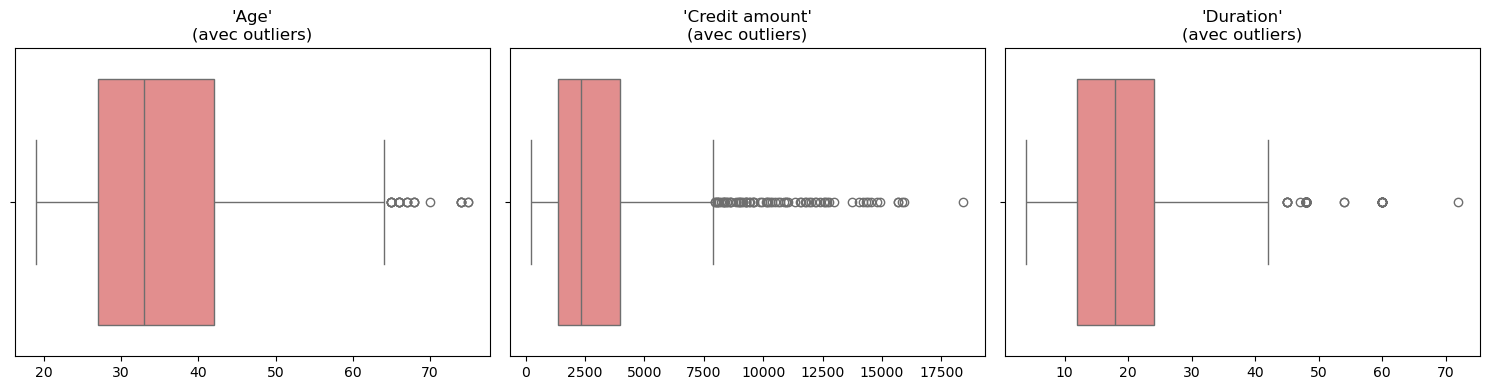

In [706]:
import matplotlib.pyplot as plt
import seaborn as sns

def sns_boxplots_row(data, features, outliers=True):
    n = len(features)
    plt.figure(figsize=(5 * n, 4))  # Ajuste la largeur en fonction du nombre de variables

    for i, feature in enumerate(features):
        plt.subplot(1, n, i + 1)
        sns.boxplot(x=data[feature], color='lightcoral')
        plt.title(f"'{feature}'" + ("\n(avec outliers)" if outliers else ""))
        plt.xlabel('')

    plt.tight_layout()
    plt.show()

# Liste des variables à visualiser
histplot_boxplot_features = ['Age', 'Credit amount', 'Duration']

# Appel de la bonne fonction
sns_boxplots_row(data=df, features=histplot_boxplot_features, outliers=True)


Je ne supprimerai aucun outlier car j'ai une petite quantité de données (seulement 1000 lignes). De toute façon, les outliers ne représentent pas des informations incohérentes. Naturellement, certains clients auront un montant de crédit plus élevé, seront plus âgés et resteront plus longtemps à consommer le service de crédit de la banque.

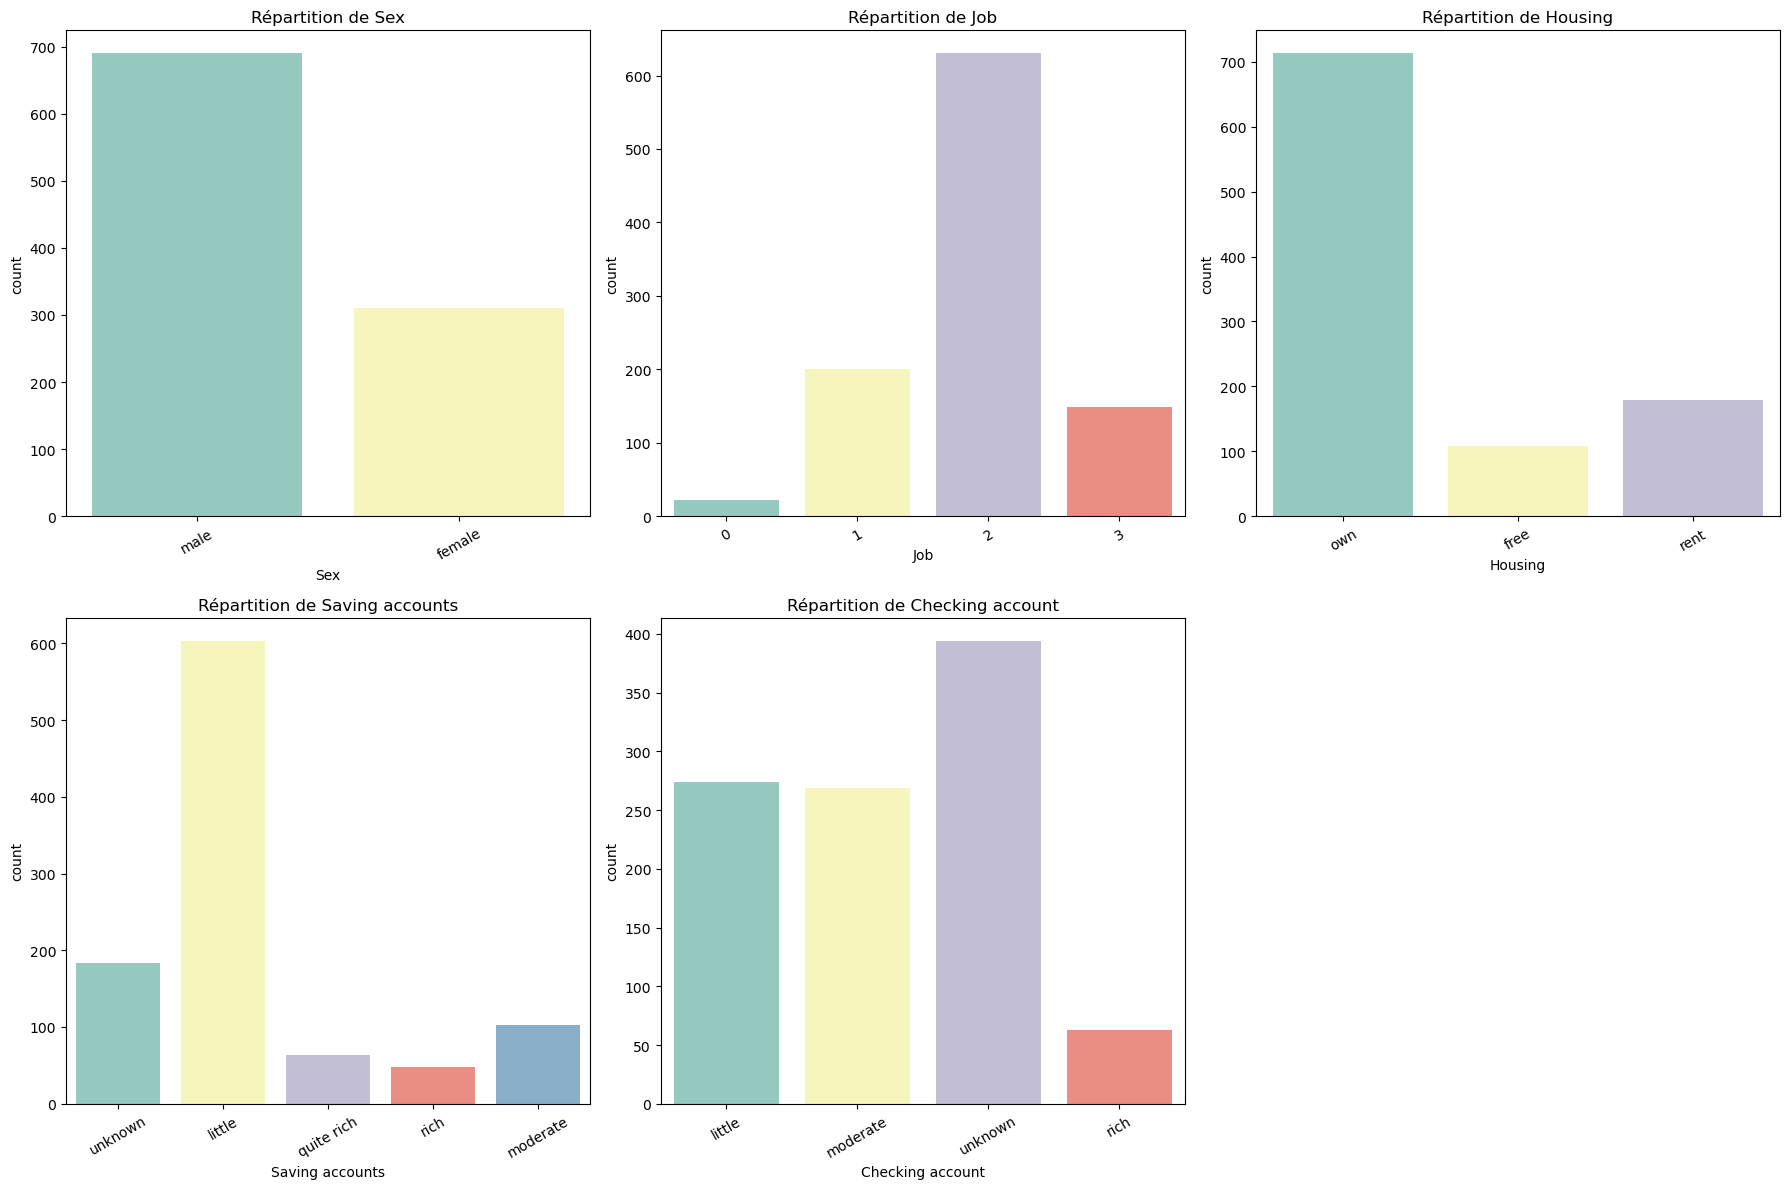

In [709]:
# Liste des variables catégoriques
features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account']

# Taille de la figure
plt.figure(figsize=(18, 12))

# Boucle sur chaque variable
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue=feature, palette='Set3', legend=False)
    plt.title(f"Répartition de {feature}")
    plt.xticks(rotation=30)
    plt.tight_layout()

# Affichage
plt.show()

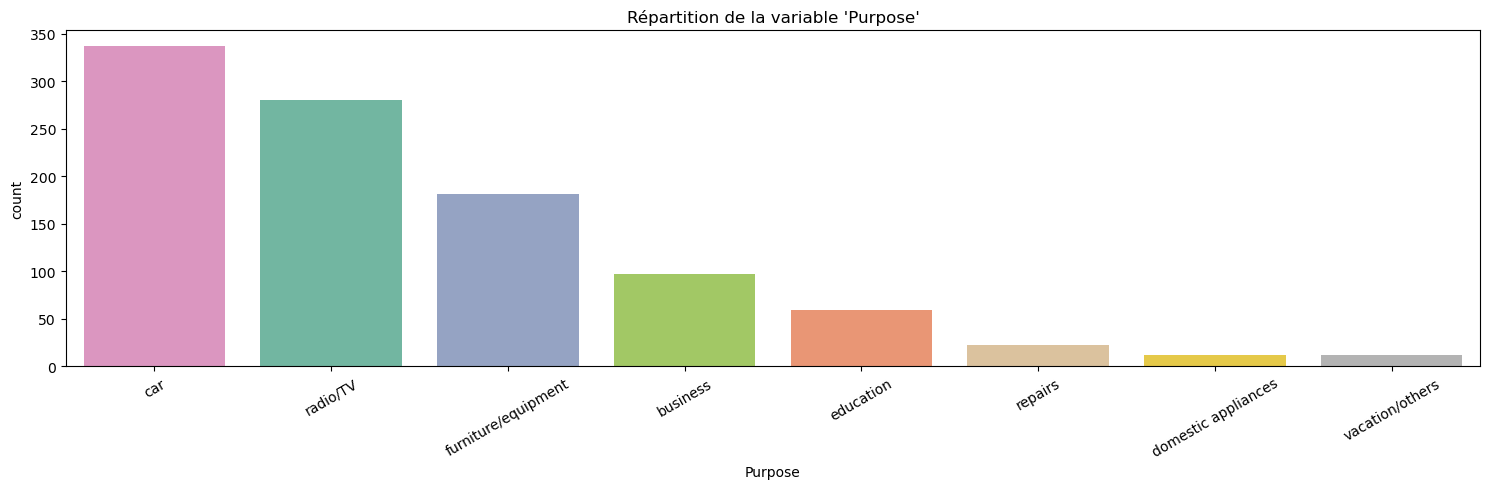

In [710]:
# Tri des catégories de 'Purpose' par fréquence (optionnel mais recommandé pour lisibilité)
purpose_order = df['Purpose'].value_counts().index

# Tracé du countplot
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='Purpose', order=purpose_order, palette='Set2', hue='Purpose', legend=False)
plt.title("Répartition de la variable 'Purpose'")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

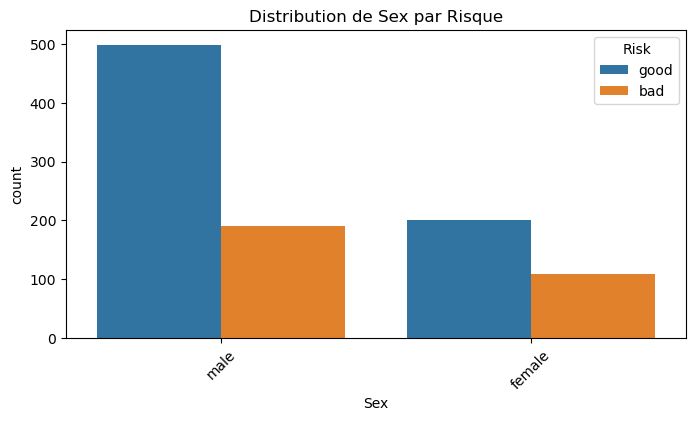

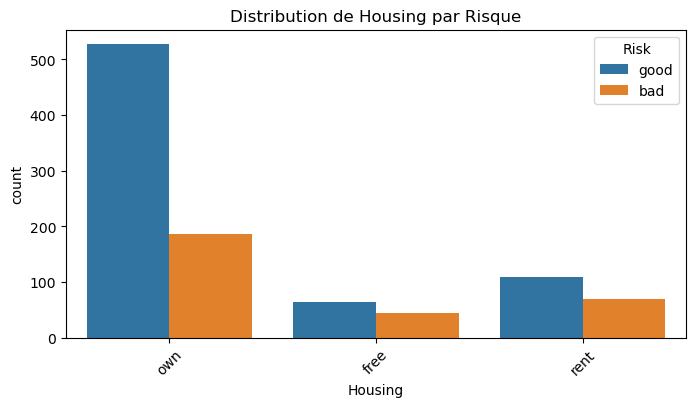

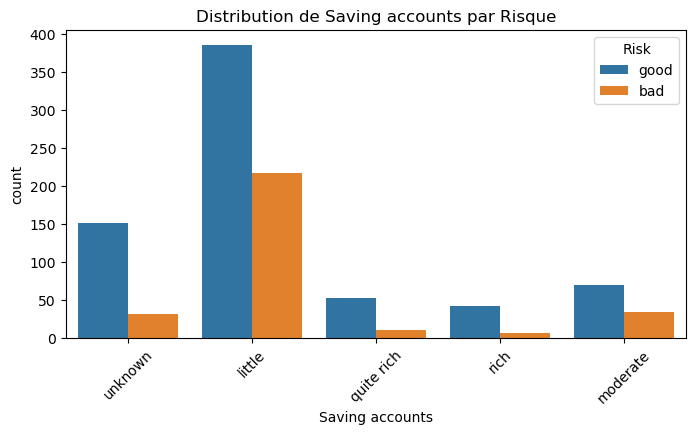

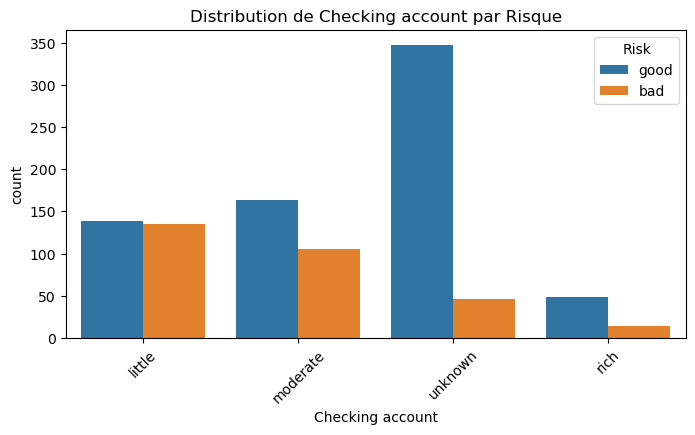

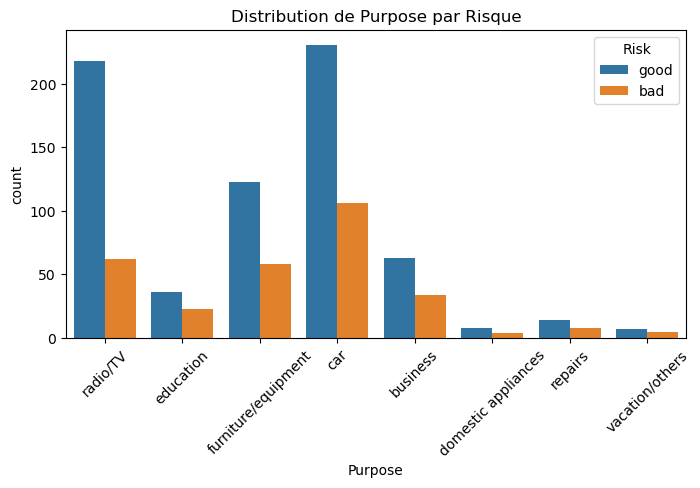

In [712]:
# Visualisation des variables catégorielles
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Risk', data=df)
    plt.title(f'Distribution de {col} par Risque')
    plt.xticks(rotation=45)
    plt.show()

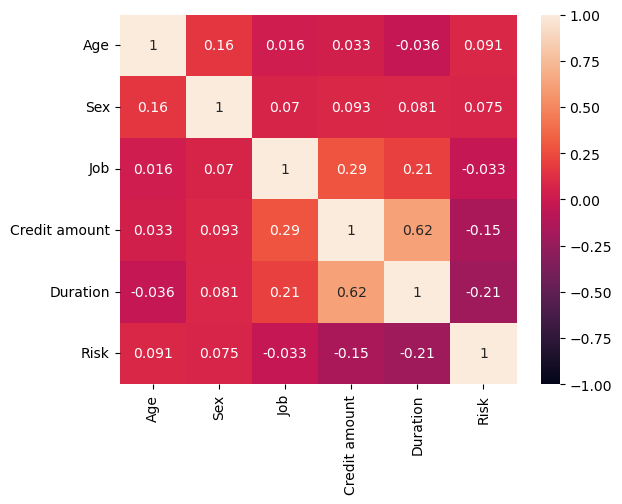

In [715]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Analyses :

La durée et le montant du crédit sont fortement corrélés positivement. Ainsi, lorsque la durée d’un crédit (comme un prêt) est plus longue, le montant associé est généralement plus élevé. Inversement, lorsqu’elle est plus courte, le montant est généralement plus faible. Cela paraît logique : des prêts plus importants nécessitent plus de temps pour être remboursés, tandis que des prêts plus petits peuvent être remboursés plus rapidement.

Le montant du crédit et le métier (Job) sont modérément corrélés positivement. Cela signifie que les clients ayant des emplois plus qualifiés ont tendance à obtenir des montants de crédit plus élevés, tandis que ceux ayant des emplois moins qualifiés obtiennent généralement des montants de crédit plus faibles.


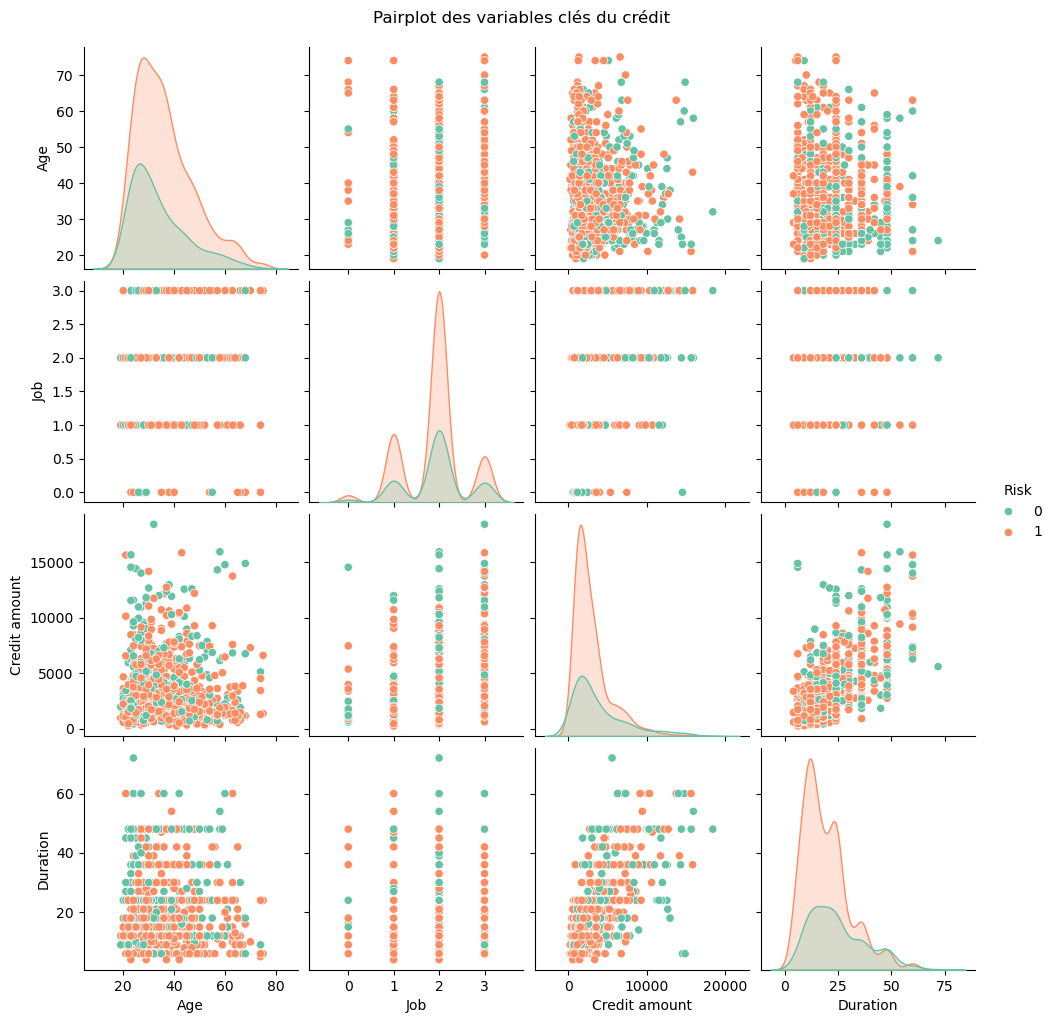

In [638]:
# Encodage des colonnes catégoriques pour pairplot
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Pairplot avec coloration selon la variable cible 'Risk'
sns.pairplot(df_encoded[['Age', 'Job', 'Credit amount', 'Duration', 'Risk']], hue='Risk', palette='Set2')
plt.suptitle("Pairplot des variables clés du crédit", y=1.02)
plt.show()